<a href="https://colab.research.google.com/github/Ankita8989/Image-classification-using-CNN/blob/main/ImageclassificationusingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMAGE CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK (CNN)

There are total 10 classes as shown below. We will use CNN for classification
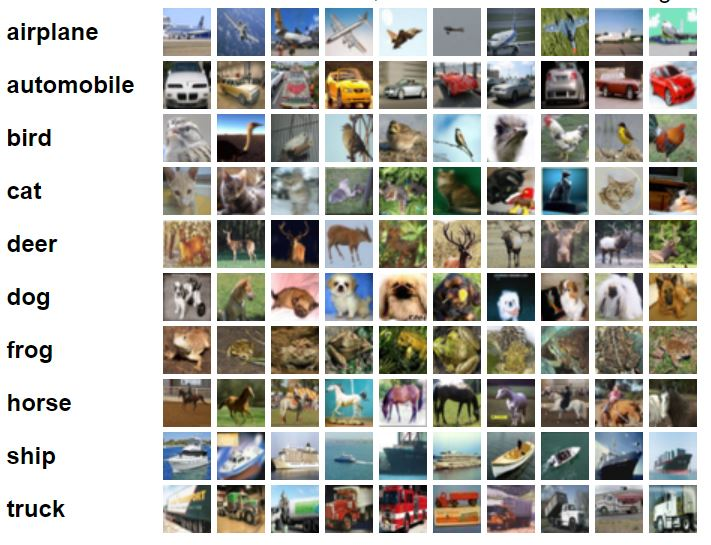

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the Dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

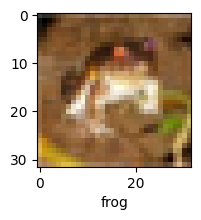

In [10]:
plot_sample(X_train, y_train, 0)

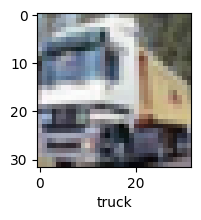

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8110 - accuracy: 0.3579
Epoch 2/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6218 - accuracy: 0.4311
Epoch 3/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.5401 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4801 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4312 - accuracy: 0.4968


You can see that at the end of 5 epochs, accuracy is at around 49%

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.77      0.48      1000
           1       0.69      0.46      0.55      1000
           2       0.33      0.49      0.39      1000
           3       0.38      0.31      0.35      1000
           4       0.61      0.17      0.26      1000
           5       0.42      0.34      0.38      1000
           6       0.57      0.48      0.52      1000
           7       0.48      0.59      0.53      1000
           8       0.70      0.44      0.54      1000
           9       0.54      0.58      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



Now let us build a convolutional neural network to train our images

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4530 - accuracy: 0.4769
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0934 - accuracy: 0.6183
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9575 - accuracy: 0.6674
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8667 - accuracy: 0.6987
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7936 - accuracy: 0.7276
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7337 - accuracy: 0.7445
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6794 - accuracy: 0.7647
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6342 - accuracy: 0.7826
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5986 - accuracy: 0.7931
Epoch 10/10
1563/1563 [==============================] - 54s 34m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 22ms/step - loss: 0.9382 - accuracy: 0.6969


[0.938230574131012, 0.6969000101089478]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[2.48621713e-04, 4.32084271e-05, 7.52440901e-05, 9.89022553e-01,
        1.00476727e-05, 5.83387492e-03, 2.97651486e-03, 1.36370663e-05,
        1.76038709e-03, 1.58775547e-05],
       [2.17152131e-03, 1.02921262e-01, 2.04646858e-06, 2.23523989e-06,
        5.86613034e-08, 1.75203285e-09, 1.17076212e-07, 4.92394259e-09,
        8.91162217e-01, 3.74044478e-03],
       [2.17222199e-01, 8.98648240e-03, 1.25157926e-02, 2.37003788e-02,
        2.03130825e-04, 1.47051178e-04, 1.73177439e-04, 3.49343102e-03,
        7.30368435e-01, 3.18986690e-03],
       [9.29971635e-01, 6.12604665e-03, 3.95768601e-03, 4.68441693e-04,
        1.01663645e-04, 1.61504431e-06, 3.08901108e-05, 1.23805603e-05,
        5.68391494e-02, 2.49051605e-03],
       [7.44014528e-07, 8.22580114e-06, 1.05803004e-02, 2.14045066e-02,
        8.93378913e-01, 4.48401988e-04, 7.41516128e-02, 3.39676581e-06,
        2.28367699e-05, 1.00174452e-06]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

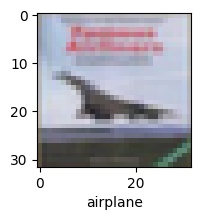

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
classes[y_classes[3]]

'airplane'